<h2/>Black Body Radiation Example<h2/>

In Planck's function the coffactor, which is proportional to $\lambda^5$, is the wavelength distribution, while the exponential term is the power emitted per unit wavelength
One integrates this function to get the total power emitted in $W/m^2$

The Planck distribution function is given by: $S[W/m^2] =\int_0^\infty \psi(\lambda,T)d\lambda = 2\pi c^2 h\int_0^\infty \frac{1}{\lambda^5 ((exp(hc/\lambda kT) - 1)}d\lambda$ where the integrand is the Planck radiation function ...Note: Argument of the exponential function is a dimensionless quantity since we are dealing with physical constants

To integrate this function analytically (see http://web.mit.edu/8.03-esg/watkins/8.03/qthd.pdf), one first uses a substitution where the argumetn of the exponential is rewritten as $\frac{1}{u}$ such that $2\pi c^2 h (\frac{kT}{hc})^4 \int_0^\infty \frac{1}{u^5 (exp(1/u)-1)}du$, then make a second change of variables where $x = \frac{1}{u}$ and $dx = -\frac{du}{u^2}$ which results in (NOTE: changing the sign of the integral reverses the limits of integration),  $S = \int_0^\infty \frac{x^3}{exp(x) - 1}dx$
This will leave you with the coffactor with a $T^4$ dependence and the above integral which gives the value $\pi/15$ and ultimately $j^* = \sigma T^4$

The first examples uses the power of python and the built in libraries offered from a group out of the University of Hamburg called PyAstronomy to plot the Plank Distribution function

/usr/local/lib/python3.9/site-packages/PyAstronomy/pyasl/asl/planck.py:56: RuntimeWarning: overflow encountered in exp
  result /= (np.exp(c.h*c.c/(lam*c.k*T)) - 1.0)


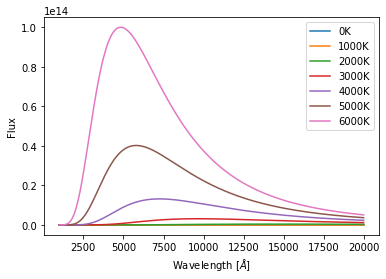

In [214]:
import numpy as np
import scipy as sp
from scipy.integrate import quad
from scipy.constants import h, c, k
import matplotlib.pyplot as plt
from PyAstronomy.pyasl import planck

# Define the range of wavelengths
lam = np.arange(1000.0*1e-10, 20000.*1e-10, 20e-10)
# Define the range of temperatures 
temp = [0.001, 1000,2000,3000,4000,5000,6000]
# Use Planck function from PyAstronomy to create the distribution function given the temperature and wavelength range
s = [planck(l, lam=lam) for l in temp]

#i = quad(s,2,10000)
#print(i)
# Create a plot for each temperature
# To-do: automate this with proper labels
l0 = plt.plot(lam*1e10, s[0], label="0K")
l1 = plt.plot(lam*1e10, s[1], label="1000K")
l2 = plt.plot(lam*1e10, s[2], label="2000K")
l3 = plt.plot(lam*1e10, s[3], label="3000K")
l4 = plt.plot(lam*1e10, s[4], label="4000K")
l5 = plt.plot(lam*1e10, s[5], label="5000K")
l6 = plt.plot(lam*1e10, s[6], label="6000K")
# Modify plot output and show plot on screen
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Flux")
plt.legend()
plt.show()

Next, integrate this function using the built-in scipy function integrate

<ipython-input-213-c606f4de9f0b>:9: RuntimeWarning: overflow encountered in exp
  return (2*h*c**2) / ((l**5)*(np.exp((h*c)/(k*l*T)) -1))


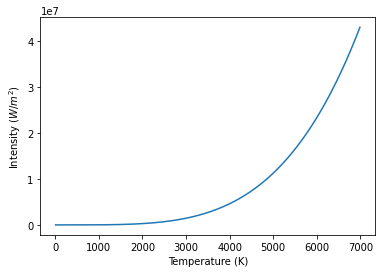

In [213]:
import numpy as np
import scipy as sp
from scipy.integrate import quad
from scipy.constants import h, c, k, sigma
import matplotlib.pyplot as plt

# Function to define and return the Planck function
def f(l,T):
    return (2*h*c**2) / ((l**5)*(np.exp((h*c)/(k*l*T)) -1))

# Define an array of temperature values    
temps = np.arange(10,7000,10)

# Create an empty list to store the intensity values after plugging in values of T
intensity = []

# Range over T values, integrate and append the value to the empty list intensity
for T in temps:
    integral, err = quad(f, 10e-8, 10e-6, args=(T, ))
    intensity.append(integral)

# Plot intensity as a function of temps
plt.plot(temps,intensity)
plt.xlabel("Temperature (K)")
plt.ylabel("Intensity $(W/m^2)$")
plt.show()